# Multi-Class Logistic Regression

This program shows how to implement **logistic regression for a multi-class classification problem** by comparing it to the **logistic regression for a binary classification problem** counterpart that we saw in class.

---

## Binary vs. Multi-Class Logistic Regression

| Feature               | Binary Logistic Regression        | Multi-Class Logistic Regression (Softmax)|
|----------------------|-----------------------------------|-------------------------------------------|
| Output               | Single probability (0 to 1)       | Vector of probabilities (one per class)   |
| Activation Function  | Sigmoid                           | Softmax                                   |
| Loss Function        | Binary cross-entropy              | Categorical cross-entropy                 |
| Use Case             | Two classes                       | Three or more classes                     |

---

We classify **fruits** based on:
- **Weight** (grams)
- **Size** (1 = Small, 2 = Medium, 3 = Large)

**Classes**:
- `0 = Apple`
- `1 = Banana`
- `2 = Orange`

In [18]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [20]:
# Hardcoded features and labels (weight and size)
X = np.array([
    [150, 1],
    [170, 1],
    [140, 1],
    [120, 1],
    [180, 2],
    [200, 2],
    [210, 2],
    [190, 2],
    [160, 3],
    [165, 3],
    [155, 3],
    [170, 3]
])

y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2])  # 0=Apple, 1=Banana, 2=Orange
class_names = ['Apple', 'Banana', 'Orange']

# One-hot encoding is a way to represent categorical data numerically.
# Each label is represented as a binary vector with all 0s except for a 1 at the index of the class.
def one_hot(y, num_classes):
    return np.eye(num_classes)[y]

Y_onehot = one_hot(y, 3)

# Normalize features
X = (X - X.mean(axis=0)) / X.std(axis=0)

In **binary classification**, we typically use the **sigmoid** function:

```python
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
```

- Maps any real-valued score to a probability between 0 and 1.
- Used when predicting two classes (e.g., 0 or 1).
- Outputs a **single probability**, interpreted as the likelihood of belonging to the positive class. If we were to plot this, we would find that as it approaches −∞, we get classify as 0, and as we approach ∞, we classify as 1.

---

In **multi-class classification**, we use the **softmax** function instead:

```python
def softmax(z):
    exp_z = np.exp(z - np.max(z))
    return exp_z / np.sum(exp_z)
```

- Converts a vector of raw scores into a **probability distribution**.
- All values are between 0 and 1 and **sum to 1**.
- Used when predicting **3 or more mutually exclusive classes**.
- Each output probability corresponds to the model's confidence in a specific class.

In [23]:
def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))  # for numerical stability
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

Here is a table displaying how training this model over many times would increase accuracy:
| Term    | Meaning                                                                 |
|---------|-------------------------------------------------------------------------|
| Epoch   | One full cycle through the training data                                |
| Cost    | A number showing how wrong the model's predictions are (lower is better)|
| Goal    | Minimize cost by adjusting weights over many epochs                     |

Cross-entropy loss is where we can compare how far predictions are from the actual labels. If this set were to use larger and larger data models, classification would end up being more accurate.

Epoch    0 | Loss: 1.0986
Epoch  100 | Loss: 0.1568
Epoch  200 | Loss: 0.0931
Epoch  300 | Loss: 0.0687
Epoch  400 | Loss: 0.0552
Epoch  500 | Loss: 0.0466
Epoch  600 | Loss: 0.0404
Epoch  700 | Loss: 0.0358
Epoch  800 | Loss: 0.0323
Epoch  900 | Loss: 0.0294


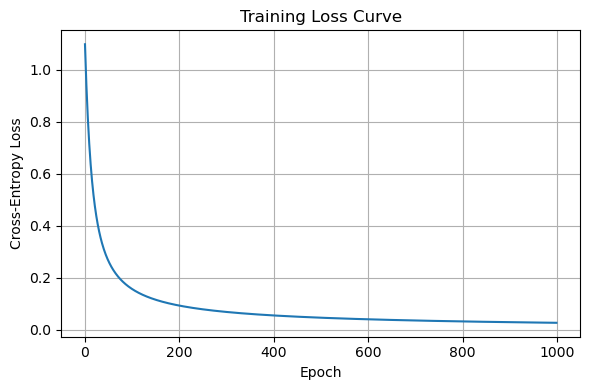

In [26]:
# Create a plot showing an example Training Loss Curve for softmax (similar to binary models with sigmoid)
# Initialize parameters
num_classes = 3
num_features = X.shape[1]
W = np.zeros((num_features, num_classes))
b = np.zeros((1, num_classes))

lr = 0.1
epochs = 1000
losses = []

# Training using gradient descent
for epoch in range(epochs):
    logits = np.dot(X, W) + b
    probs = softmax(logits)
    loss = -np.mean(np.sum(Y_onehot * np.log(probs + 1e-9), axis=1))
    losses.append(loss)
    
    dW = np.dot(X.T, (probs - Y_onehot)) / X.shape[0]
    db = np.sum(probs - Y_onehot, axis=0, keepdims=True) / X.shape[0]
    
    W -= lr * dW
    b -= lr * db

    if epoch % 100 == 0:
        print(f"Epoch {epoch:4d} | Loss: {loss:.4f}")

# Plot loss over time
plt.figure(figsize=(6, 4))
plt.plot(losses, label='Loss')
plt.xlabel("Epoch")
plt.ylabel("Cross-Entropy Loss")
plt.title("Training Loss Curve")
plt.grid(True)
plt.tight_layout()
plt.show()

In [28]:
# Final predictions
logits = np.dot(X, W) + b
probs = softmax(logits)
predictions = np.argmax(probs, axis=1)

accuracy = np.mean(predictions == y)
print(f"\n Final Accuracy: {accuracy * 100:.2f}%")

# Prediction output
for i, p in enumerate(predictions):
    print(f"Sample {i+1:>2}: True = {class_names[y[i]]:<7} | Predicted = {class_names[p]:<7} | Probabilities = {np.round(probs[i], 3)}")


 Final Accuracy: 100.00%
Sample  1: True = Apple   | Predicted = Apple   | Probabilities = [0.997 0.002 0.001]
Sample  2: True = Apple   | Predicted = Apple   | Probabilities = [0.927 0.072 0.001]
Sample  3: True = Apple   | Predicted = Apple   | Probabilities = [0.999 0.    0.001]
Sample  4: True = Apple   | Predicted = Apple   | Probabilities = [1. 0. 0.]
Sample  5: True = Banana  | Predicted = Banana  | Probabilities = [0.064 0.87  0.066]
Sample  6: True = Banana  | Predicted = Banana  | Probabilities = [0.002 0.996 0.002]
Sample  7: True = Banana  | Predicted = Banana  | Probabilities = [0.    0.999 0.   ]
Sample  8: True = Banana  | Predicted = Banana  | Probabilities = [0.011 0.976 0.013]
Sample  9: True = Orange  | Predicted = Orange  | Probabilities = [0.001 0.008 0.992]
Sample 10: True = Orange  | Predicted = Orange  | Probabilities = [0.001 0.018 0.981]
Sample 11: True = Orange  | Predicted = Orange  | Probabilities = [0.001 0.003 0.996]
Sample 12: True = Orange  | Predicted

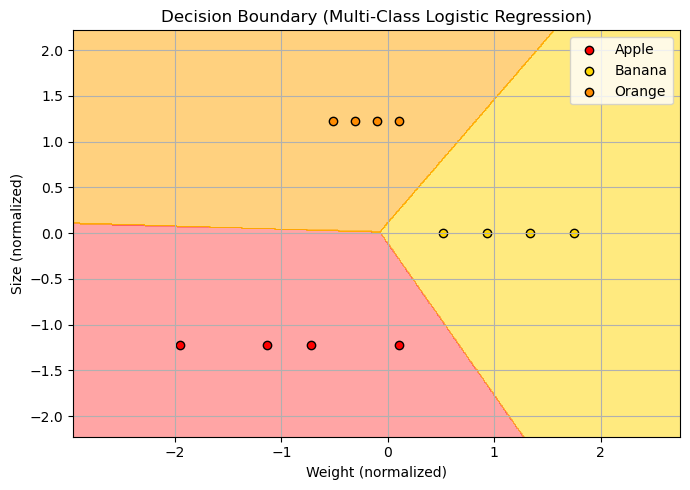

In [30]:
# Final plot of the data points and classiifications given
from matplotlib.colors import ListedColormap

def plot_decision_boundary(X, y, model, W, b, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = 0.01

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    grid = np.c_[xx.ravel(), yy.ravel()]
    Z = model(np.dot(grid, W) + b)
    Z = np.argmax(Z, axis=1).reshape(xx.shape)

    # Give fruit section colors
    fruit_cmap = ListedColormap(['#FF4C4C', '#FFD700', '#FFA500'])

    plt.figure(figsize=(7, 5))
    plt.contourf(xx, yy, Z, cmap=fruit_cmap, alpha=0.5)
    plt.grid(True)

    # Plot fruit color points
    for i, color in zip(range(3), ['red', 'gold', 'darkorange']):
        plt.scatter(X[y == i, 0], X[y == i, 1], label=class_names[i], edgecolor='k', color=color)

    # Plot labels and display
    plt.legend()
    plt.title(title)
    plt.xlabel("Weight (normalized)")
    plt.ylabel("Size (normalized)")
    plt.tight_layout()
    plt.show()

plot_decision_boundary(X, y, softmax, W, b, "Decision Boundary (Multi-Class Logistic Regression)")
